In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cmocean
import xarray as xr
import scipy.io as sio
from math import radians, cos, sin, asin, sqrt
import pylab as pl
from matplotlib.ticker import FormatStrFormatter
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_Brink(file_fig):#,file_h): #, file_ratio):
    # Brink mode
    file = sio.loadmat(file_fig)
    z, xpl, xxx, zzz, xgr, zgr = file['z'][0,:], file['xpl'][0,:], file['xxx'][0,:], file['zzz'][0,:], file['xgr'], file['zgr']
    k, omega,epe,eke = file['wavenumber'][0][0], file['frequency'][0][0], file['epe'][0][0],file['eke'][0][0]

    # (u is cross-shore and v is alongshore in Brink.)
    p0, u0, v0, w0, r0 = file['p'], file['u'],file['v'], file['wvel'], file['rho']

    scale=0.2
    w = w0.transpose() * 0.01 * scale # cms-1 to ms-1 and normalization (?)
    u = u0.transpose() * 0.01 * scale # cms-1 to ms-1 and normalization 
    v = v0.transpose() * 0.01 * scale # cms-1 to ms-1 and normalization 
    r = r0.transpose() * 1.0 * scale # mg/cm³ to kg/m³ and normalization
    p = p0.transpose() * 0.1 * scale # dyn/cm² to 0.1 Pa (or kg m-1 s-2) and normalization
    
    
    return(u,v,w,r,p,z,k,omega,xpl, xxx, zzz,zgr.transpose(),xgr.transpose(), epe, eke)

def plotbrink(ax,grid_X,grid_Z,levelsb,xlab,ylab,nr,varbrink,pres):
    ax.set_facecolor('tan')
    cax=ax.contourf(grid_X,grid_Z,varbrink ,cmap=cmocean.cm.delta,levels=levelsb)
    ax.contour(grid_X,grid_Z,varbrink , levels=[0], linewidths=2, 
                linestyles='-', colors='k', zorder=2)
    if pres==0:
        if nr==-1:
            ax.set_title(f'MITgcm cross section')
        else:
            ax.set_title(f'Mode {nr+1}')
        if (nr % 2) != 0:
            ax.set(xlabel=xlab, ylabel=ylab)
        else:
            ax.set(xlabel=xlab)
            ax.tick_params(axis='y',which='both', left=True, right=False, labelleft=False) # labels along the bottom edge are off
    else:
        ax.set_title(f'Mode {nr+1}')
        if nr==0:
            ax.set( ylabel=ylab)
            ax.tick_params(axis='x',which='both', left=True, right=False, labelleft=False) # labels along the bottom edge are off
        elif nr==2:
            ax.set(xlabel='Cross-shore distance [km]', ylabel=ylab)
        elif nr==1:
            ax.tick_params(axis='y',which='both', left=True, right=False, labelleft=False) # labels along the bottom edge are off
            ax.tick_params(axis='x',which='both', left=True, right=False, labelleft=False) # labels along the bottom edge are off
        else:
            ax.set(xlabel='Cross-shore distance [km]')
            ax.tick_params(axis='y',which='both', left=True, right=False, labelleft=False) # labels along the bottom edge are off

        
    return cax

In [3]:
u,v0,w0,r,p0,z,k0,omega0,xpl, xxx, zzz, zgr, xgr, epe0, eke0= get_Brink('Crossects/dataSVB30.7mode0.mat')
u,v1,w1,r,p1,z,k1,omega1,xpl, xxx, zzz, zgr, xgr, epe1, eke1= get_Brink('Crossects/dataSVB30.7mode1.mat')
u,v2,w2,r,p2,z,k2,omega2,xpl, xxx, zzz, zgr, xgr, epe2, eke2= get_Brink('Crossects/dataSVB30.7mode2.mat')
u,v3,w3,r,p3,z,k3,omega3,xpl, xxx, zzz, zgr, xgr, epe3, eke3= get_Brink('Crossects/dataSVB30.7mode3.mat')
u,v4,w4,r,p4,z,k4,omega4,xpl, xxx, zzz, zgr, xgr, epe4, eke4= get_Brink('Crossects/dataSVB30.7mode4.mat')
u,v5,w5,r,p5,z,k5,omega5,xpl, xxx, zzz, zgr, xgr, epe5, eke5= get_Brink('Crossects/dataSVB30.7mode5.mat')

filedisp1 = sio.loadmat('Crossects/dispr30.7mode1.mat')
filedisp2 = sio.loadmat('Crossects/dispr30.7mode2.mat')
filedisp3 = sio.loadmat('Crossects/dispr30.7mode3.mat')
filedisp4 = sio.loadmat('Crossects/dispr30.7mode4.mat')
filedisp5 = sio.loadmat('Crossects/dispr30.7mode5.mat')



In [4]:
d1 = filedisp1['dispcurve']
d2 = filedisp2['dispcurve']
d3 = filedisp3['dispcurve']
d4 = filedisp4['dispcurve']
d5 = filedisp5['dispcurve']

In [5]:
der1=(d1[1:33,1]-d1[:32,1])/(d1[1:33,0]-d1[:32,0])
der2=(d2[1:28,1]-d2[:27,1])/(d2[1:28,0]-d2[:27,0])
der3=(d3[1:39,1]-d3[:38,1])/(d3[1:39,0]-d3[:38,0])
der4=(d4[1:33,1]-d4[:32,1])/(d4[1:33,0]-d4[:32,0])


In [28]:
ds307=xr.open_dataset('Crossects/LinReg307FILT.nc')

TIME=ds307.time.values
VALMIT=ds307.valmit.values
grid_X=ds307.gridX
grid_Z=ds307.gridZ

In [31]:
params = {'font.size': 20,
          'figure.figsize': (11, 13),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

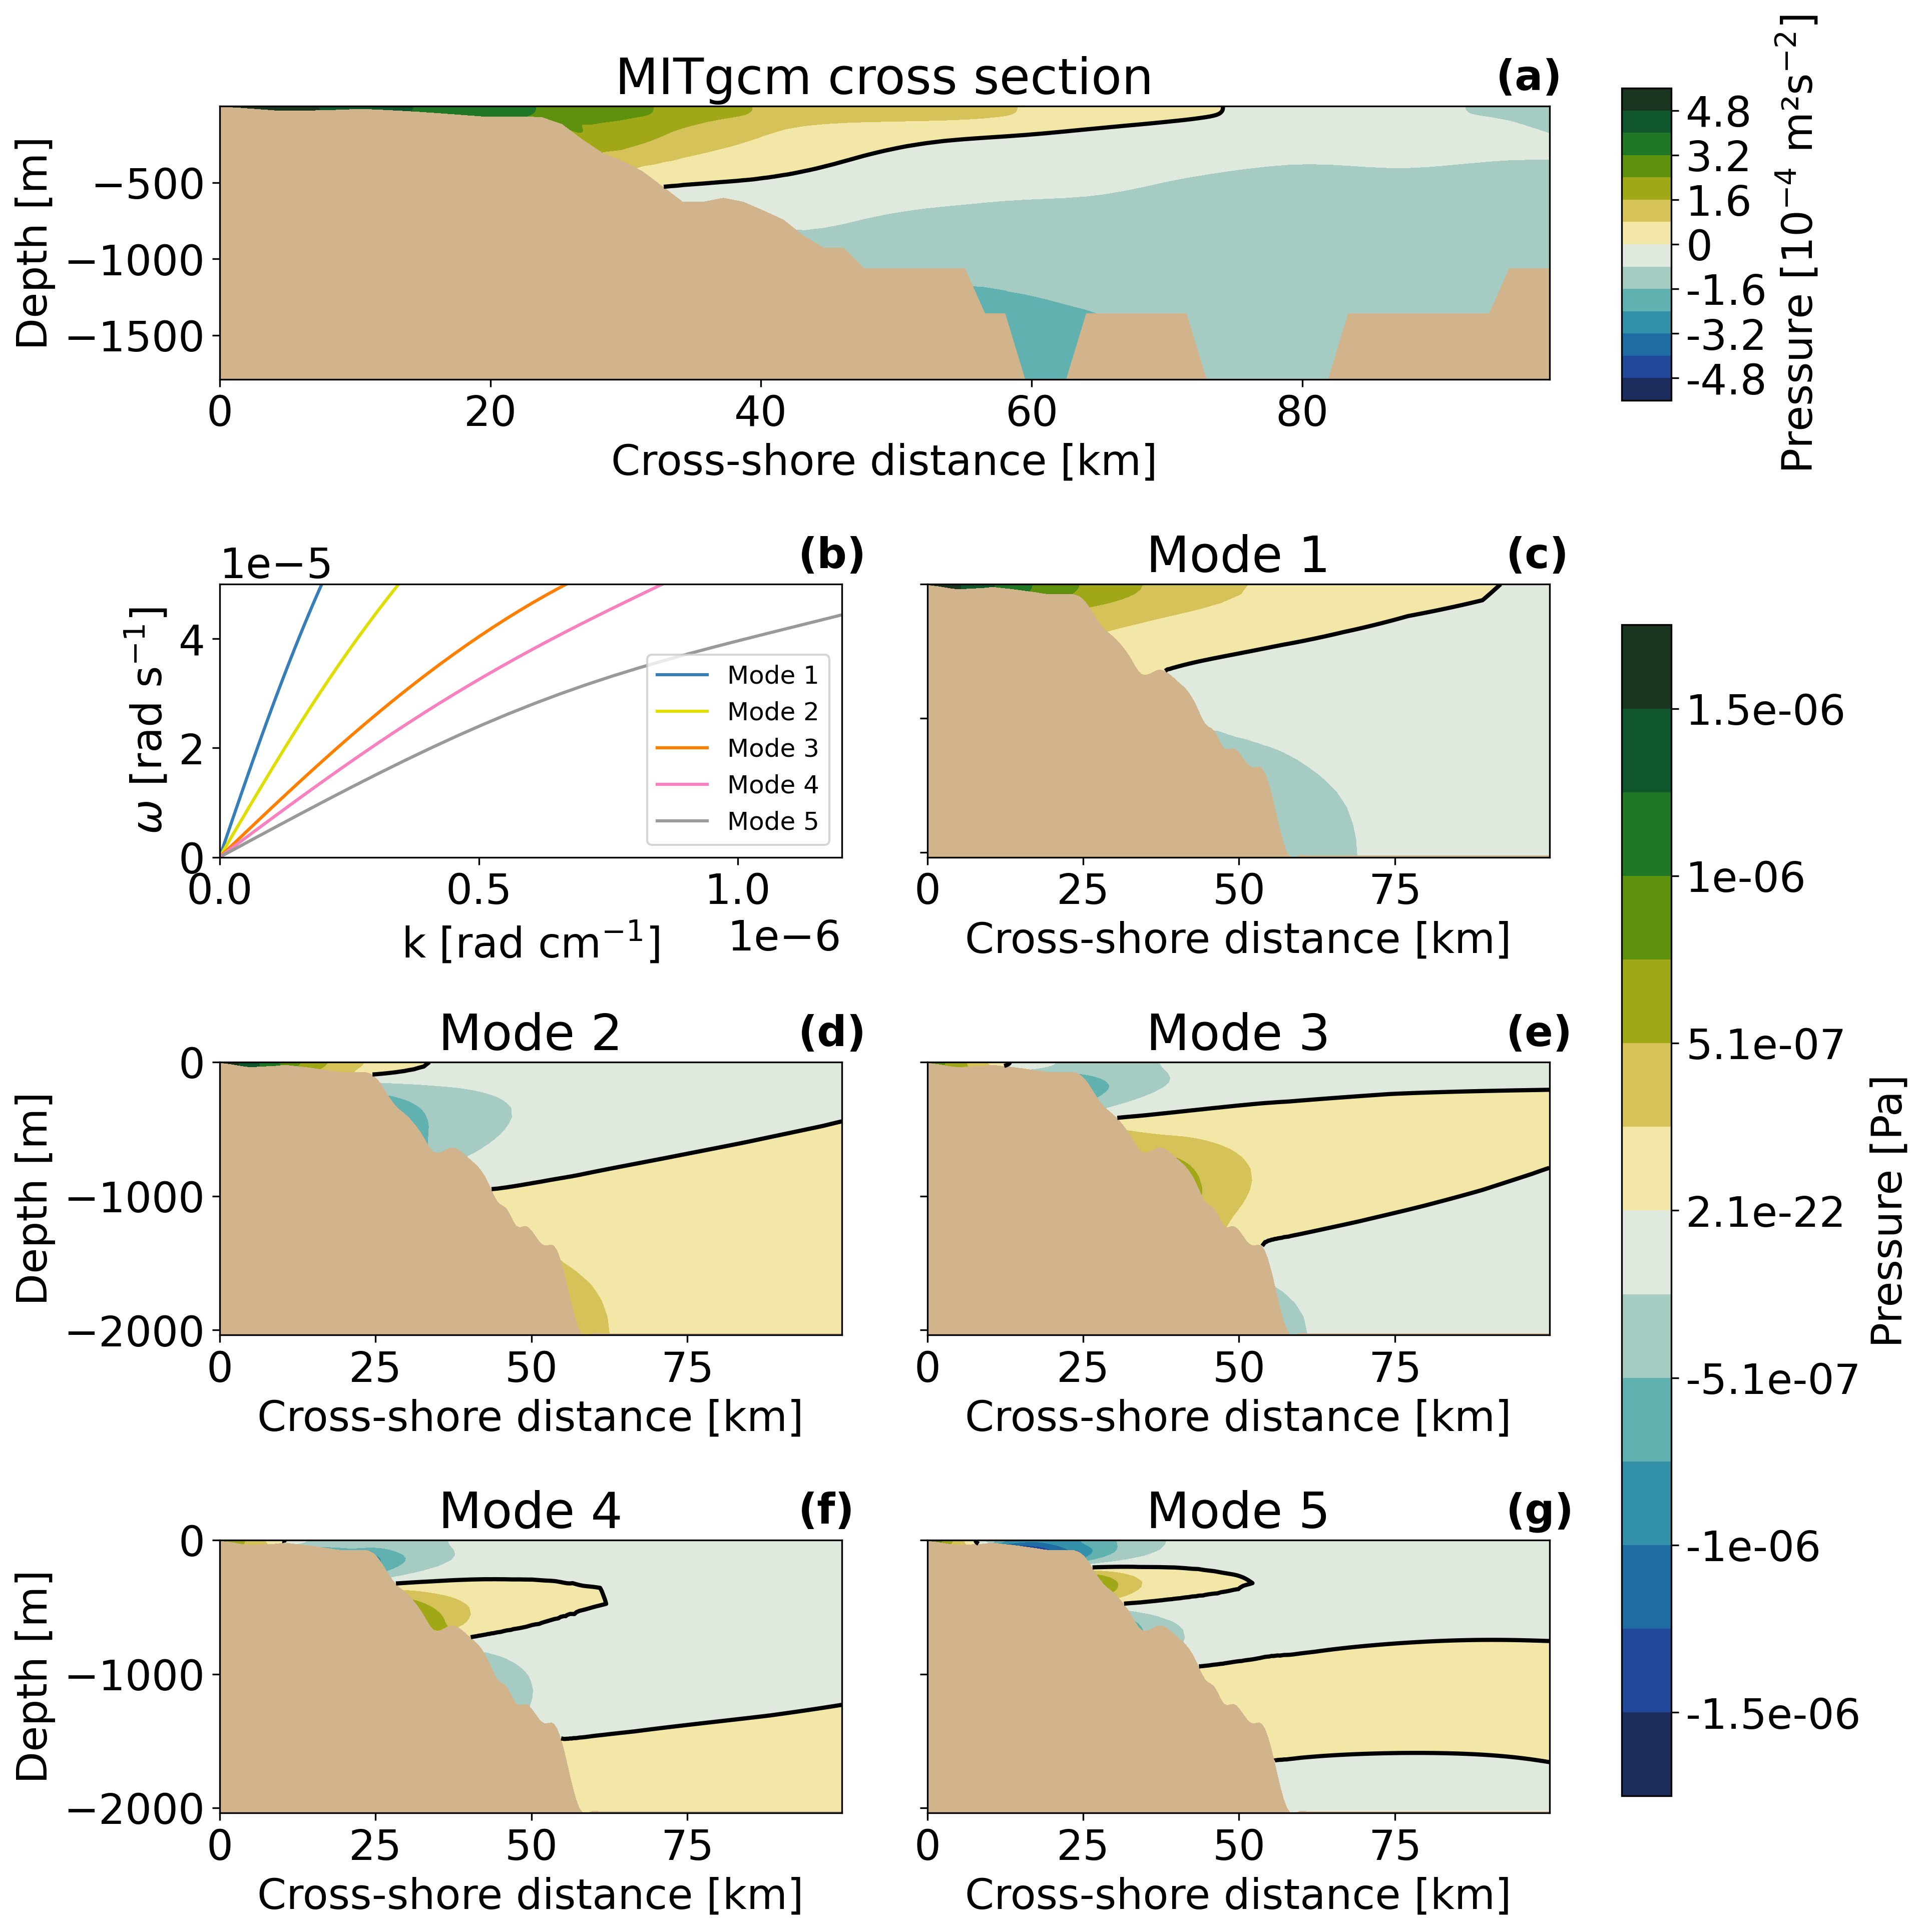

In [32]:
vals=np.array([p0, p1, p2, p3, p4,p5])
disp=np.array([d1, d2, d3, d4,d5])
eke=np.array([eke0, eke1, eke2, eke3, eke4,eke5])
epe=np.array([epe0, epe1,epe2, epe3, epe4,epe5])
omega=np.array([omega0, omega1,omega2, omega3, omega4,omega5])
k=np.array([k0, k1,k2, k3, k4,k5])

pres=0

vminb=-np.nanmax(abs(vals))
vmaxb=np.nanmax(abs(vals))

levelsb=np.linspace(vminb,vmaxb,15)

t=np.where(TIME==2*60*24)[0][0]
vmin=-np.nanmax(abs(VALMIT[t]))*1e4
vmax=np.nanmax(abs(VALMIT[t]))*1e4

levels=np.linspace(vmin,vmax,15)

xlab='Cross-shore distance [km]'
ylab='Depth [m]'
modes=len(vals[:,1,1])
    
fig = plt.figure(tight_layout=True)
if modes<=4:
    gs = GridSpec(nrows=3, ncols=2, height_ratios=[1,1,1])
elif modes<=6:
    gs = GridSpec(nrows=4, ncols=2, height_ratios=[1,1,1,1])
elif modes<=8:
    gs = GridSpec(nrows=5, ncols=2, height_ratios=[1,1,1,1,1])

ax = fig.add_subplot(gs[0, 0:])
cax1=plotbrink(ax,grid_X,grid_Z,levels,xlab,ylab,-1,VALMIT[t]*1e4,pres)

cbar_ax1 = fig.add_axes([1, 0.8, 0.03, 0.16])
fig.colorbar(cax1, cax=cbar_ax1)
cbar_ax1.set_ylabel('Pressure [$10^{-4}$ m²s$^{-2}$]')
cbar_ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))

ax.text(0.96, 1.06, '(a)', fontweight='bold', color='k', 
            transform=ax.transAxes)

ax = fig.add_subplot(gs[1, 0])
omega=7.2921e-5
lat=30.7
f=omega*2*sin(lat*np.pi/180)
ax.axhline(y=f,color='gray',linewidth=1)
ax.plot(d1[:33,0],d1[:33,1],color='#377eb8',label= 'Mode 1')
ax.plot(d2[:28,0],d2[:28,1],color='#dede00',label= 'Mode 2')
ax.plot(d3[:39,0],d3[:39,1],color='#ff7f00',label= 'Mode 3')
ax.plot(d4[:33,0],d4[:33,1],color='#f781bf',label= 'Mode 4')
ax.plot(d5[:25,0],d5[:25,1],color='#999999',label= 'Mode 5')
ax.set(xlabel='k [rad cm$^{-1}]$', ylabel='$\omega$ [rad s$^{-1}$]')
ax.legend(fontsize=12)
ax.set_ylim(0,5*1e-5)
ax.set_xlim(0,1.2*1e-6)
ax.text(0.93, 1.06, '(b)', fontweight='bold', color='k', 
            transform=ax.transAxes)

for i in np.arange(0,modes-1,1):
        if i<=0:
            ax = fig.add_subplot(gs[1, i+1])
            ax.text(0.93, 1.06, '(c)', fontweight='bold', color='k', 
            transform=ax.transAxes)
        elif i<=2:
            ax = fig.add_subplot(gs[2, i-1])
            if i==1:
                ax.text(0.93, 1.06, '(d)', fontweight='bold', color='k', 
                transform=ax.transAxes)
            else:
                ax.text(0.93, 1.06, '(e)', fontweight='bold', color='k', 
                transform=ax.transAxes)
        elif i<=4:
            ax = fig.add_subplot(gs[3, i-3])
            if i==3:
                ax.text(0.93, 1.06, '(f)', fontweight='bold', color='k', 
                transform=ax.transAxes)
            else:
                ax.text(0.93, 1.06, '(g)', fontweight='bold', color='k', 
                transform=ax.transAxes)
        elif i<=6:
            ax = fig.add_subplot(gs[4, i-5])
        cax2=plotbrink(ax,xgr,zgr,levelsb,xlab,ylab,i,vals[i+1],pres)

cbar_ax = fig.add_axes([1, 0.085, 0.03, 0.6])
fig.colorbar(cax2, cax=cbar_ax)
cbar_ax.set_ylabel('Pressure [Pa]')
cbar_ax.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))
        
#print(f'period (days) {(2*np.pi)/omega/(3600*24)}')
#print(f'c (m/s) {omega/(k*100)}')
#print(f'R=EKE/EPE {(eke/epe)}')

# Group velocity and complete dispersion curves

In [35]:
params = {'font.size': 16,
          'figure.figsize': (11, 6),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

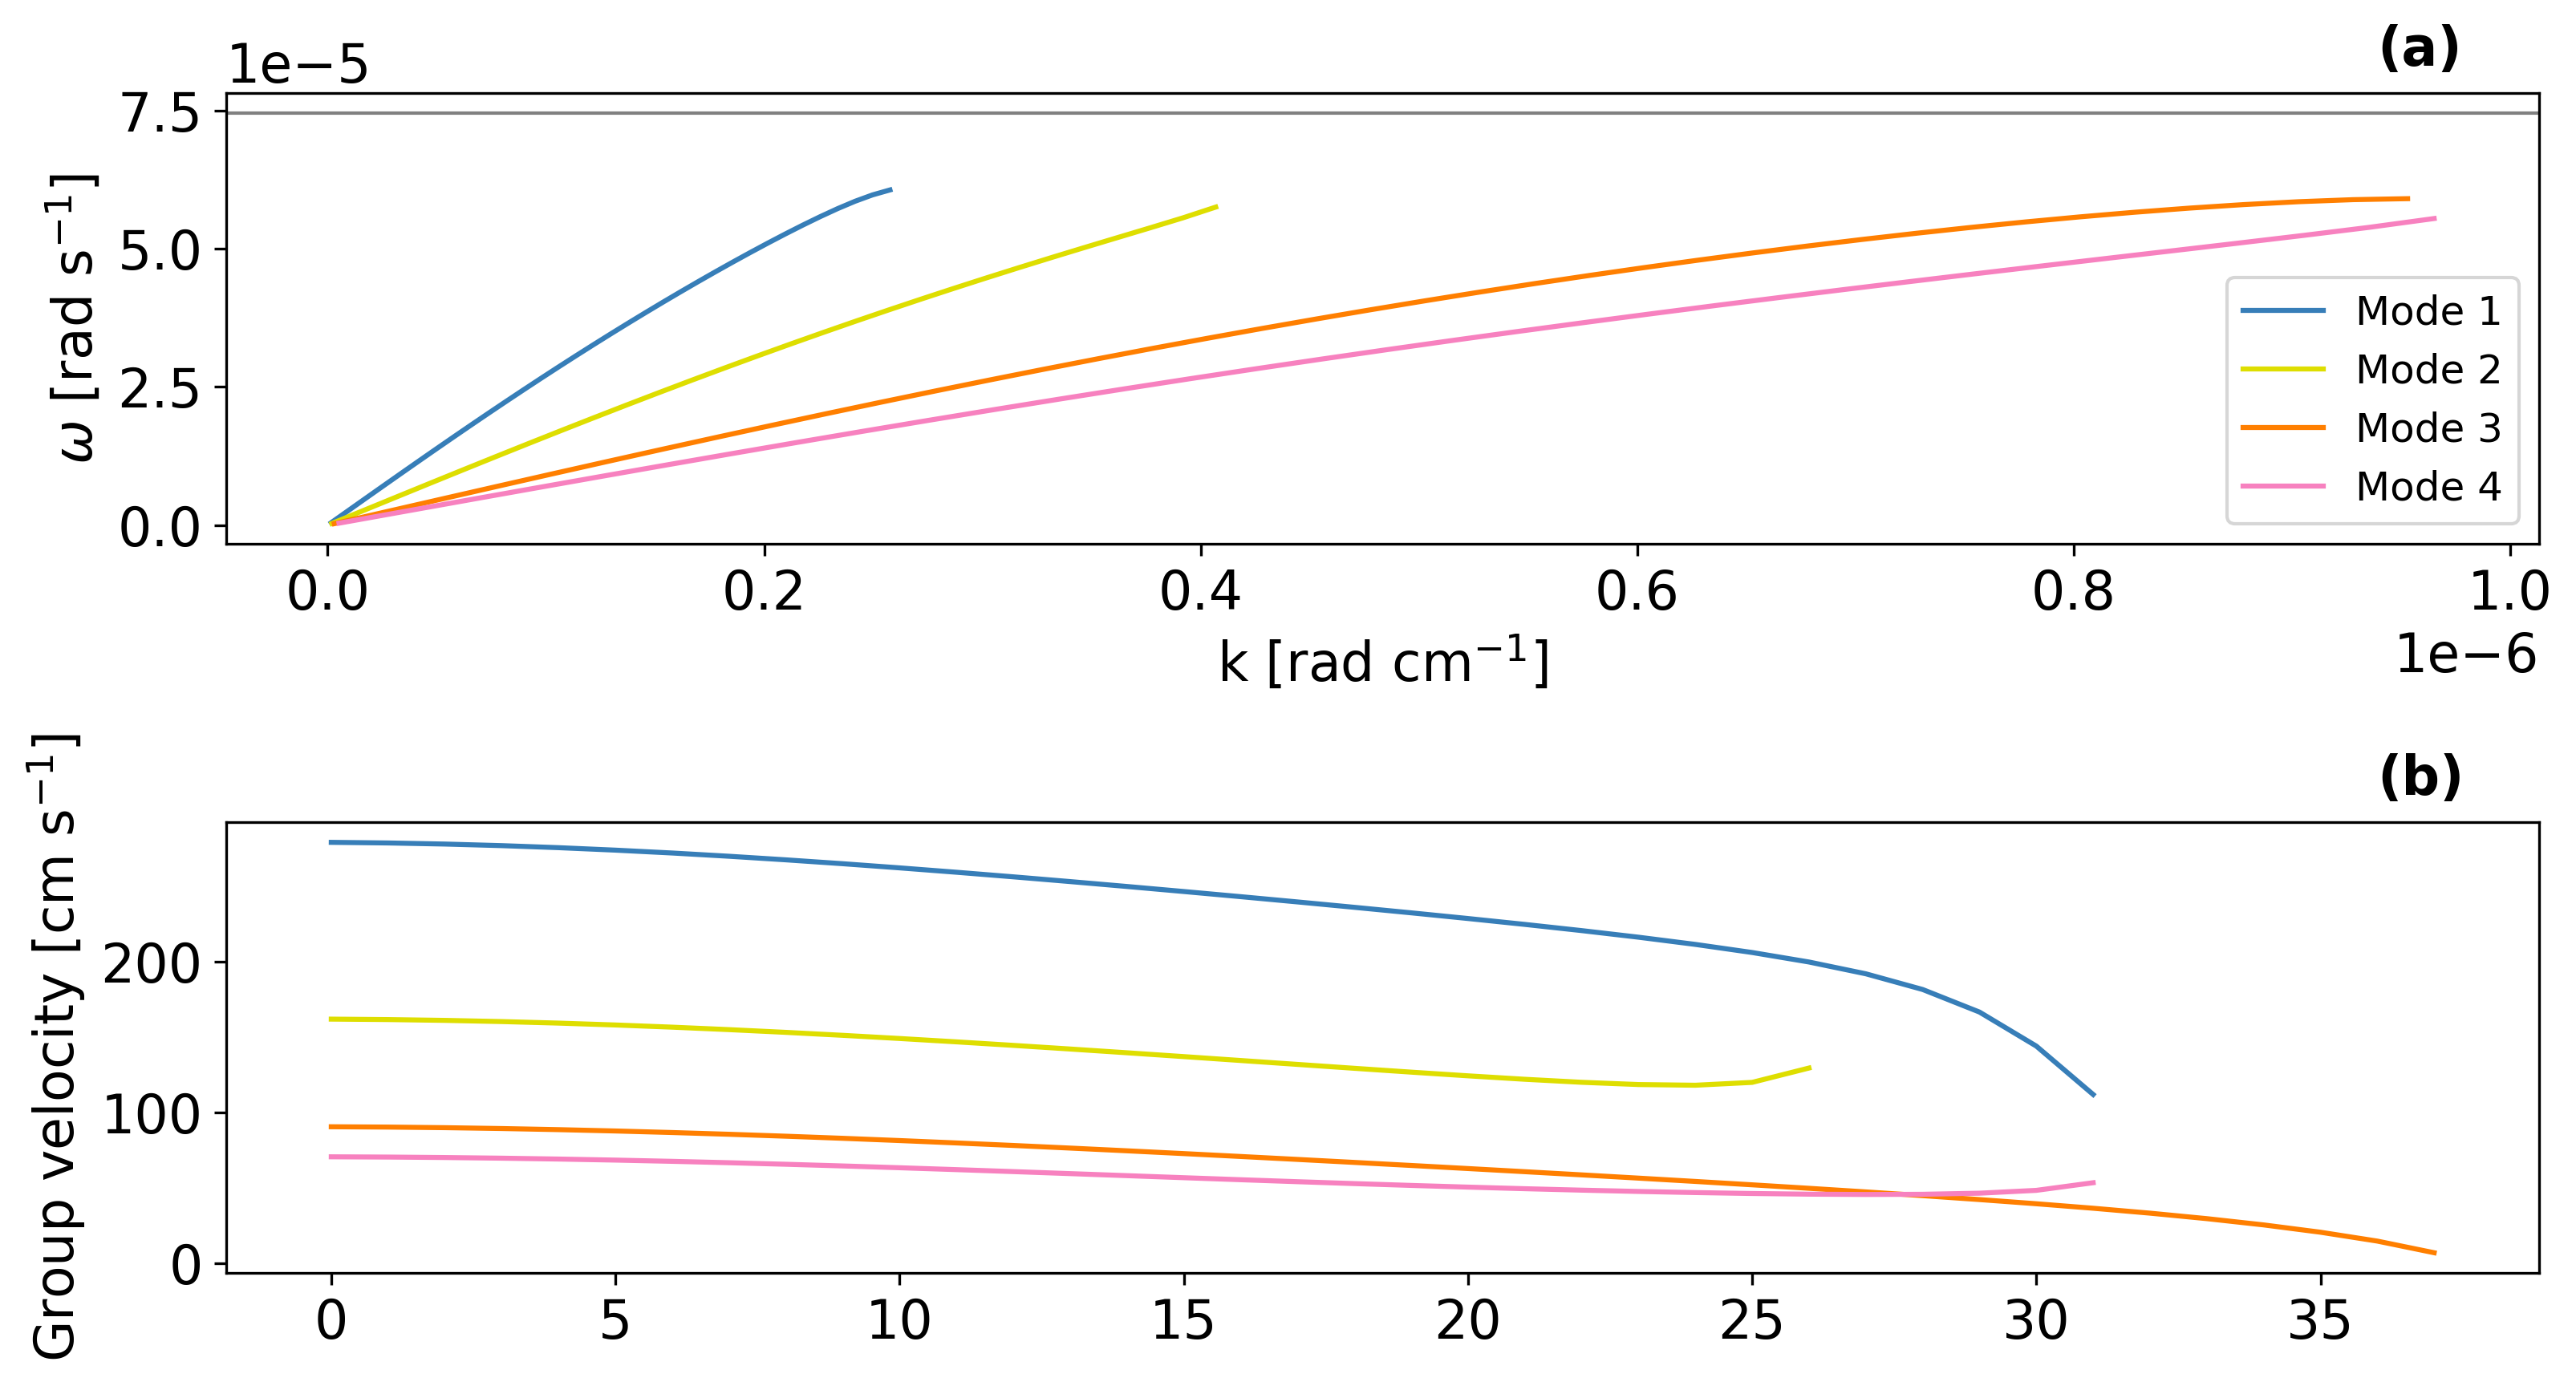

In [36]:
omega=7.2921e-5
lat=30.7
f=omega*2*sin(lat*np.pi/180)

ax=plt.subplot(2,1,1)
ax.axhline(y=f,color='gray',linewidth=1)
ax.plot(d1[:33,0],d1[:33,1],color='#377eb8',label= 'Mode 1')
ax.plot(d2[:28,0],d2[:28,1],color='#dede00',label= 'Mode 2')
ax.plot(d3[:39,0],d3[:39,1],color='#ff7f00',label= 'Mode 3')
ax.plot(d4[:33,0],d4[:33,1],color='#f781bf',label= 'Mode 4')
#ax.plot(d5[:25,0],d5[:25,1],color='#999999',label= 'Mode 5')
ax.set(xlabel='k [rad cm$^{-1}]$', ylabel='$\omega$ [rad s$^{-1}$]')
ax.legend(fontsize=12)
ax.text(0.93, 1.06, '(a)', fontweight='bold', color='k', 
            transform=ax.transAxes)

ax1=plt.subplot(2,1,2)

ax1.plot(np.arange(0,len(der1),1),der1,color='#377eb8',label= 'Mode 1')
ax1.plot(np.arange(0,len(der2),1),der2,color='#dede00',label= 'Mode 2')
ax1.plot(np.arange(0,len(der3),1),der3,color='#ff7f00',label= 'Mode 3')
ax1.plot(np.arange(0,len(der4),1),der4,color='#f781bf',label= 'Mode 4')
#ax1.plot(np.arange(0,len(der1),1),der1,color='#999999',label= 'Mode 5')
ax1.set(xlabel='', ylabel='Group velocity [cm s$^{-1}$]')

ax1.text(0.93, 1.06, '(b)', fontweight='bold', color='k', 
            transform=ax1.transAxes)
plt.tight_layout()

# Plot for presentation

In [39]:
params = {'font.size': 24,
          'figure.figsize': (11, 13),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

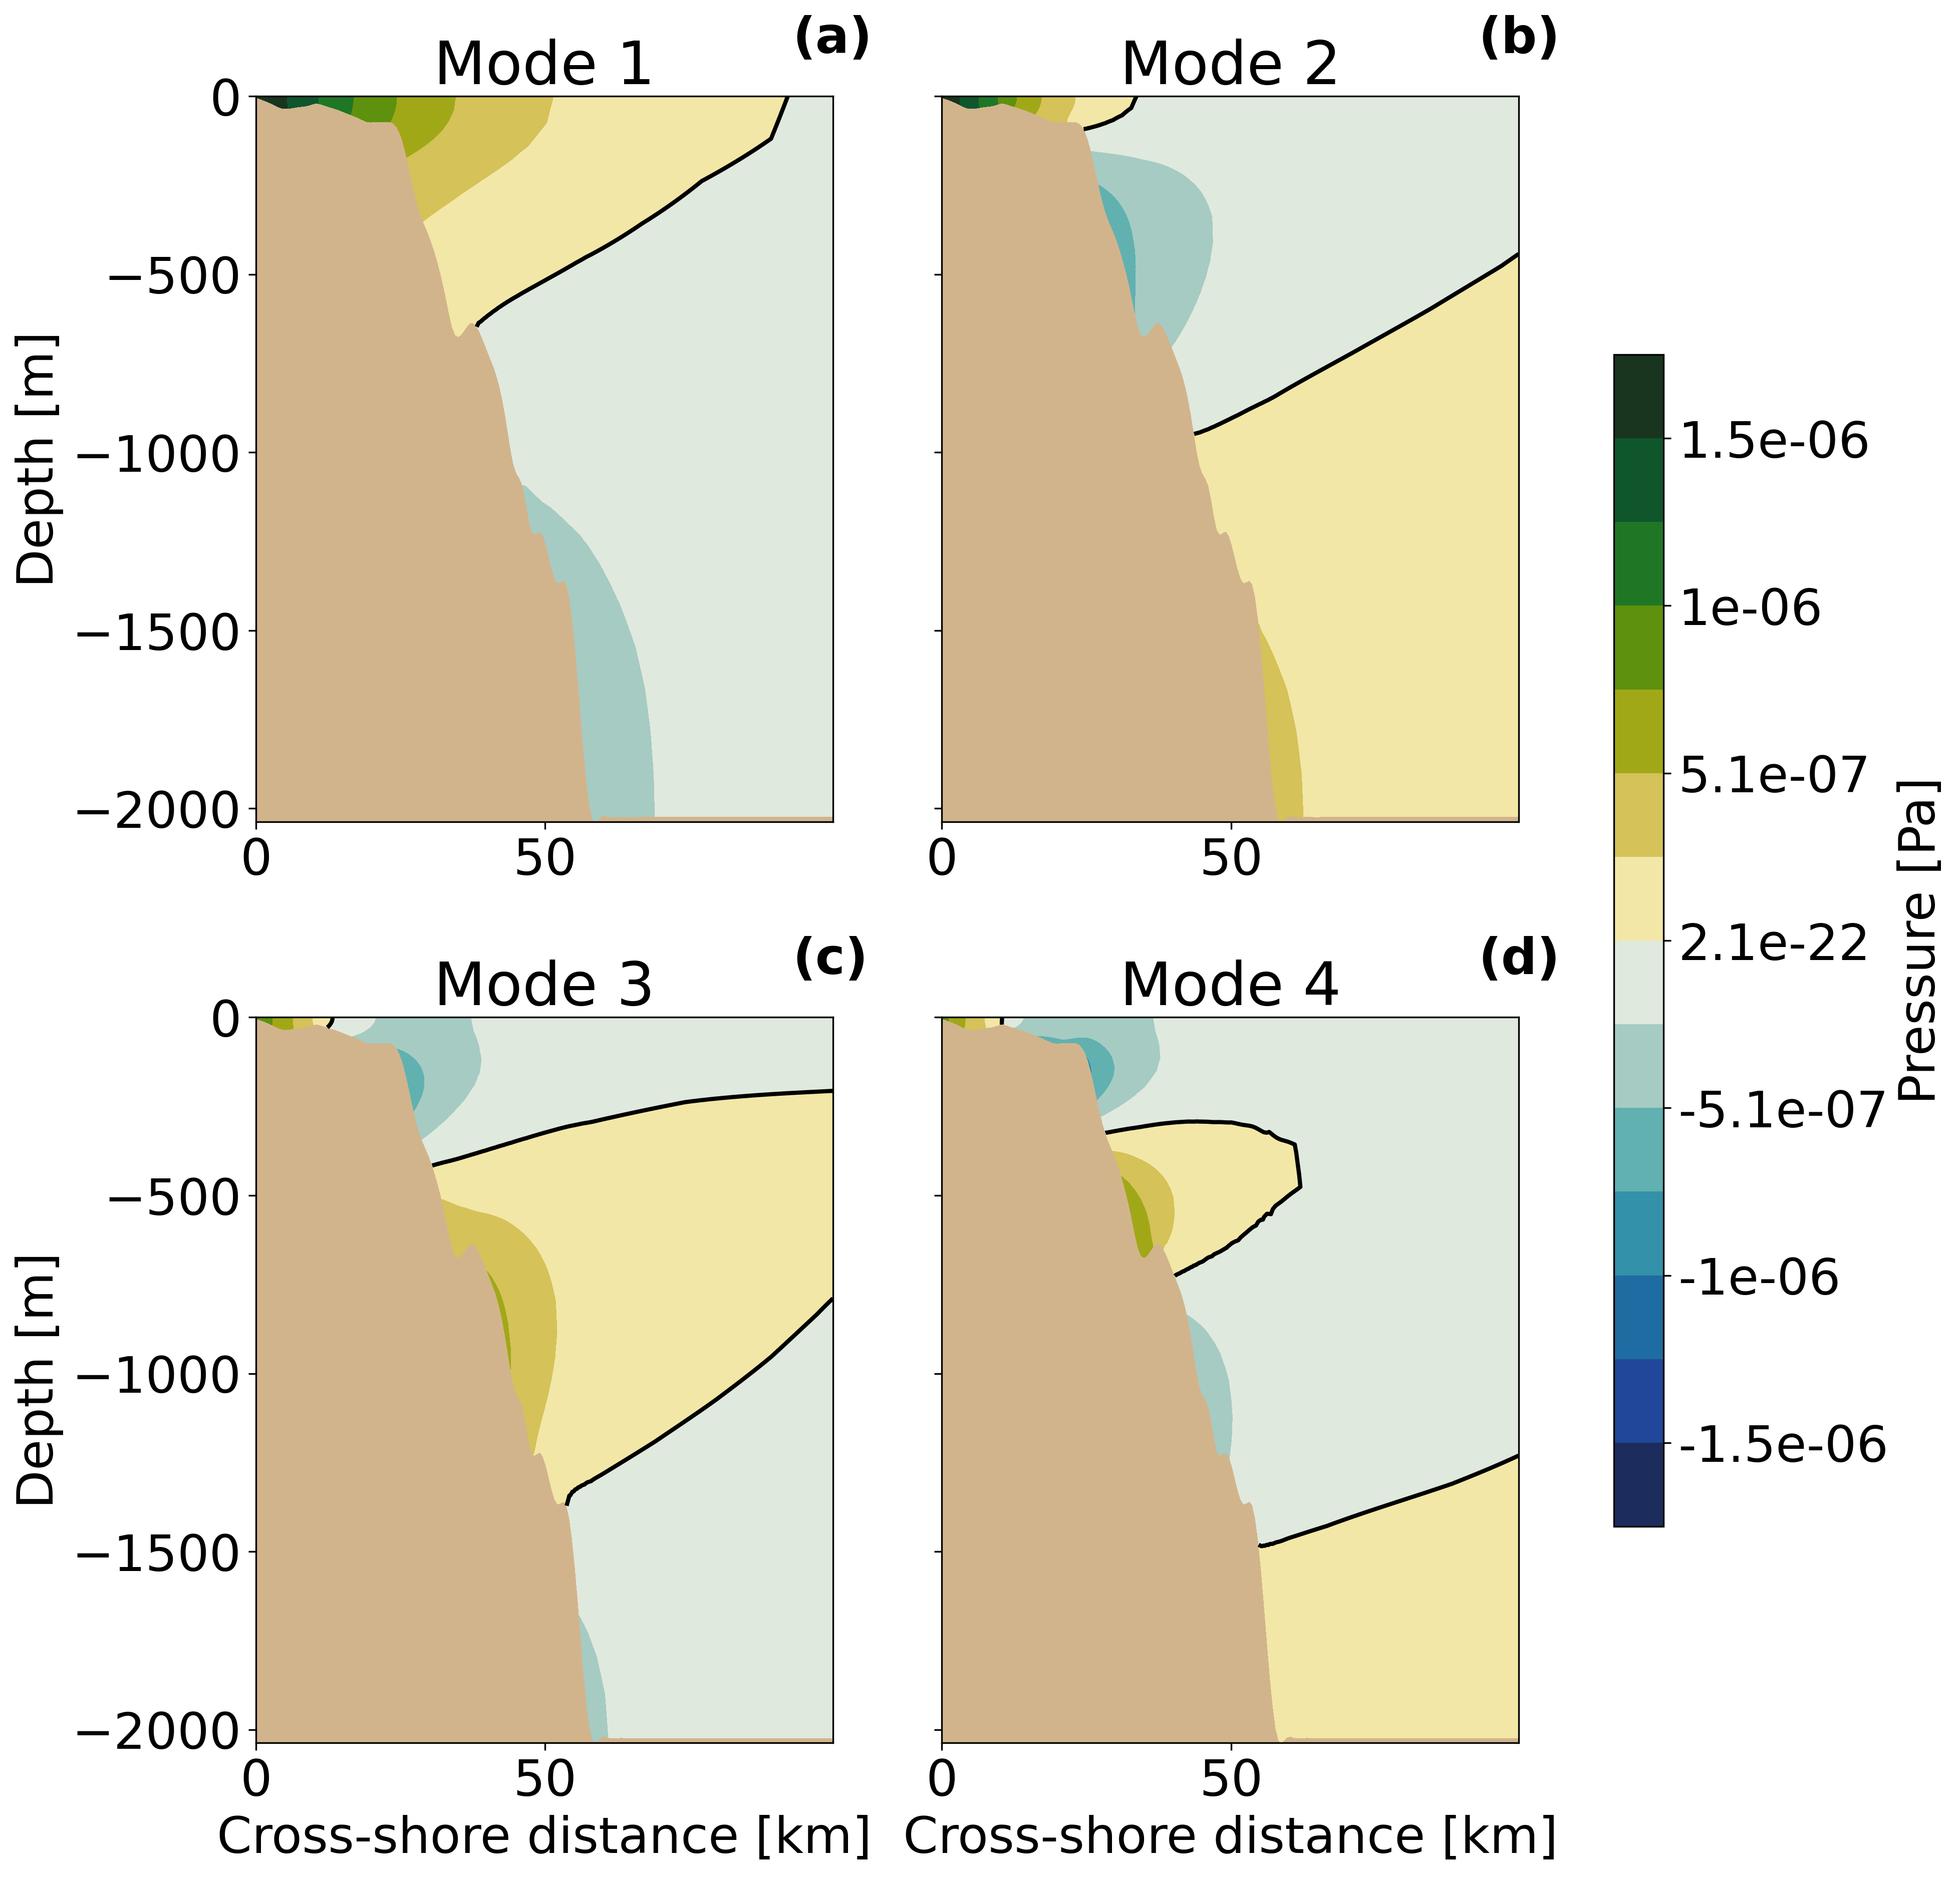

In [40]:
vals=np.array([p0, p1, p2, p3, p4,p5])
disp=np.array([d1, d2, d3, d4,d5])
eke=np.array([eke0, eke1, eke2, eke3, eke4,eke5])
epe=np.array([epe0, epe1,epe2, epe3, epe4,epe5])
omega=np.array([omega0, omega1,omega2, omega3, omega4,omega5])
k=np.array([k0, k1,k2, k3, k4,k5])

pres=1

vminb=-np.nanmax(abs(vals))
vmaxb=np.nanmax(abs(vals))

levelsb=np.linspace(vminb,vmaxb,15)

t=np.where(TIME==2*60*24)[0][0]
vmin=-np.nanmax(abs(VALMIT[t]))*1e4
vmax=np.nanmax(abs(VALMIT[t]))*1e4

levels=np.linspace(vmin,vmax,15)

xlab='Cross-shore distance [km]'
ylab='Depth [m]'
modes=len(vals[:,1,1])
    
fig = plt.figure(tight_layout=True)
if modes<=4:
    gs = GridSpec(nrows=3, ncols=2, height_ratios=[1,1,1])
elif modes<=6:
    gs = GridSpec(nrows=2, ncols=2)
elif modes<=8:
    gs = GridSpec(nrows=5, ncols=2, height_ratios=[1,1,1,1,1])

for i in np.arange(0,4,1):
        if i<=0:
            ax = fig.add_subplot(gs[0, i])
            ax.text(0.93, 1.06, '(a)', fontweight='bold', color='k', 
            transform=ax.transAxes)
        elif i==1: 
            ax = fig.add_subplot(gs[0, 1])
            ax.text(0.93, 1.06, '(b)', fontweight='bold', color='k', 
            transform=ax.transAxes)
        elif i==2:
            ax = fig.add_subplot(gs[1, 0])
            ax.text(0.93, 1.06, '(c)', fontweight='bold', color='k', 
            transform=ax.transAxes)
        elif i==3:
            ax = fig.add_subplot(gs[1, 1])
            ax.text(0.93, 1.06, '(d)', fontweight='bold', color='k', 
            transform=ax.transAxes)
        cax2=plotbrink(ax,xgr,zgr,levelsb,xlab,ylab,i,vals[i+1],pres)

cbar_ax = fig.add_axes([1, 0.2, 0.03, 0.6])
fig.colorbar(cax2, cax=cbar_ax)
cbar_ax.set_ylabel('Pressure [Pa]')
cbar_ax.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))
        
#print(f'period (days) {(2*np.pi)/omega/(3600*24)}')
#print(f'c (m/s) {omega/(k*100)}')
#print(f'R=EKE/EPE {(eke/epe)}')

## Calculate the correlation matrix for the certain modes

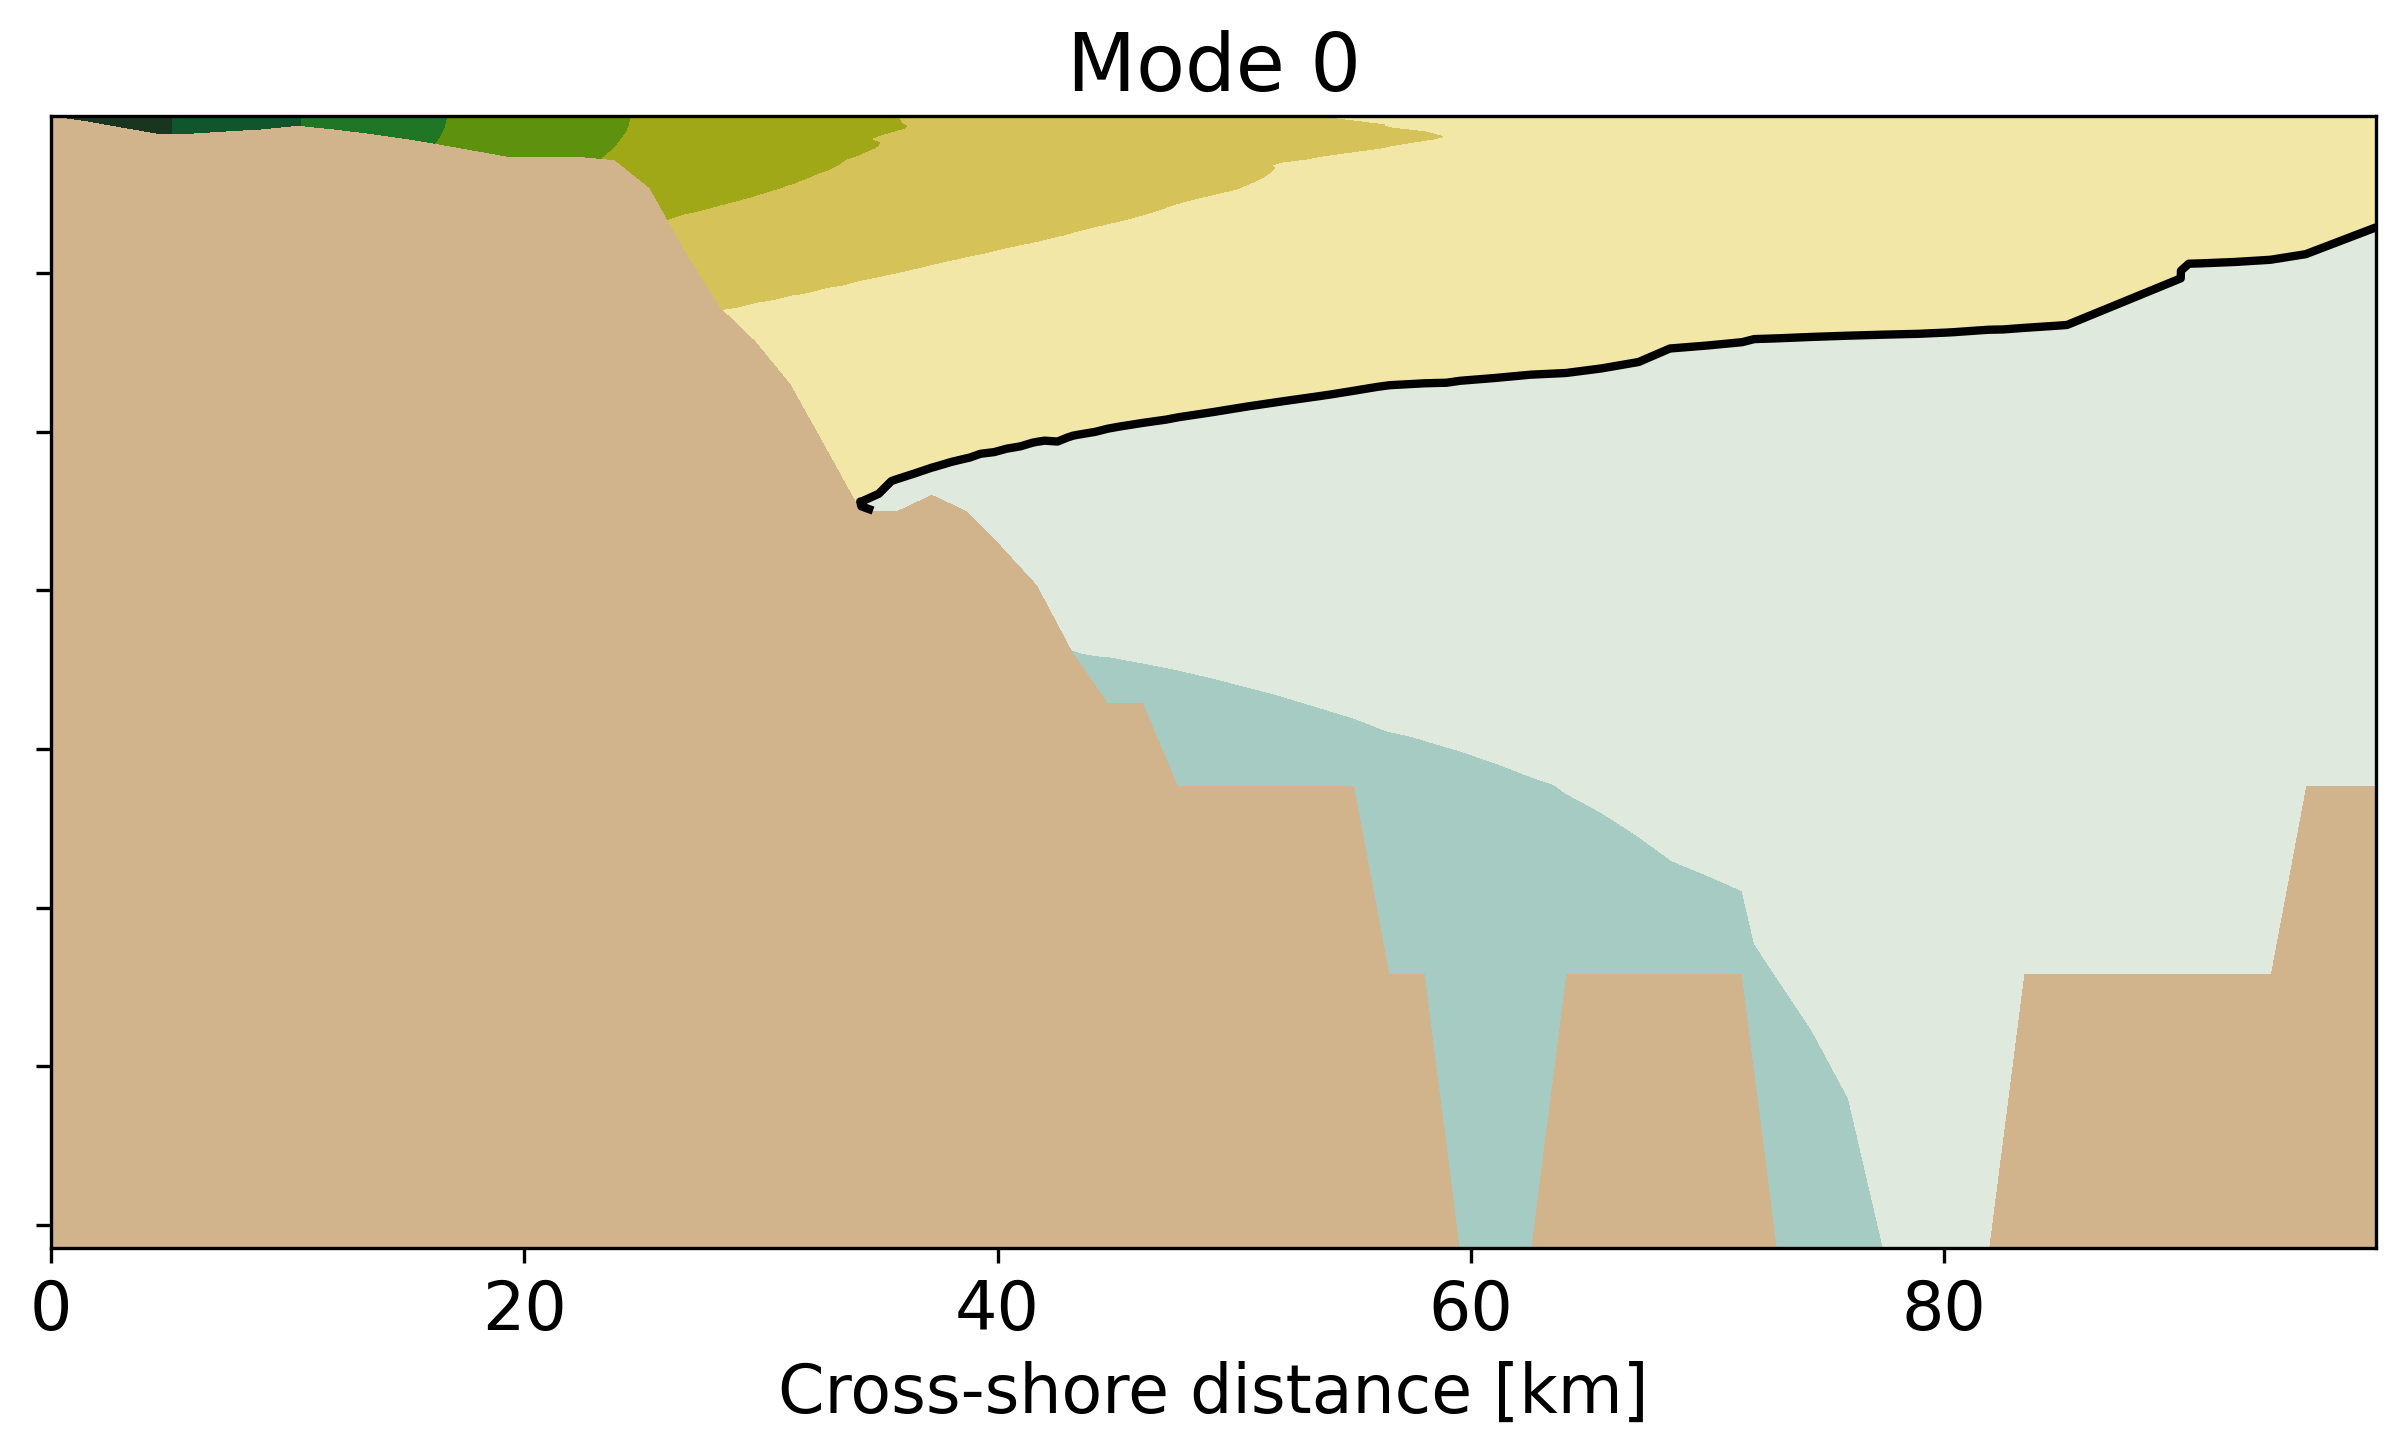

In [27]:
ds307=xr.open_dataset('Crossects/LinReg307FILT.nc')

ds307

TIME=ds307.time.values
VALMIT=ds307.valmit.values
grid_X=ds307.gridX
grid_Z=ds307.gridZ

valbrink=ds307.varbrink.values

vminb=-np.nanmax(abs(valbrink1))
vmaxb=np.nanmax(abs(valbrink1))

levelsb=np.linspace(vminb,vmaxb,15)

xlab='Crosshore distance [km]'
ylab='Depth [m]'

fig,ax=plt.subplots()
plotbrink(ax,grid_X,grid_Z,levelsb,xlab,ylab,i,ds307.varbrink.values[0],4)

In [21]:
VALFIT=ds307.valfit.values

In [22]:
zpi,xpi=np.where(VALFIT[i,:,:]<100)
valbrink1=ds307.varbrink.values[0]
valbrink2=ds307.varbrink.values[1]
valbrink3=ds307.varbrink.values[2]
valbrink4=ds307.varbrink.values[3]
valbrink5=ds307.varbrink.values[4]

valin=np.vstack((valbrink1[zpi,xpi],valbrink2[zpi,xpi],valbrink3[zpi,xpi],valbrink4[zpi,xpi],valbrink5[zpi,xpi]))

In [14]:
beta307=ds307.betas.values
colors=['#377eb8','#dede00','#ff7f00','#f781bf','#999999']
markers=Line2D.filled_markers
markers=np.delete(markers,np.arange(2,5,1))

In [121]:
corr=np.zeros((len(VALFIT[:,0,0]),5))
zpi,xpi=np.where(VALFIT[i,:,:]<100)
for i in np.arange(0,len(VALFIT[:,0,0]),1):
    
    corrmat=np.corrcoef(valin.T*beta307[i,1:],VALMIT[i,zpi,xpi],rowvar=False)
    corr[i]=corrmat[-1,:-1]

In [15]:
beta307[0]

array([-1.90887060e-04,  5.50231778e+02, -1.34878356e+02,  1.14449117e+02,
       -1.55105049e+02,  1.21104717e+01])

In [123]:
corr[0]

array([ 0.9822377 , -0.81104976,  0.27353434, -0.09228245, -0.19694183])

In [16]:
params = {'font.size': 16,
          'figure.figsize': (10, 5),
         'font.family':'sans'}
pl.rcParams.update(params)

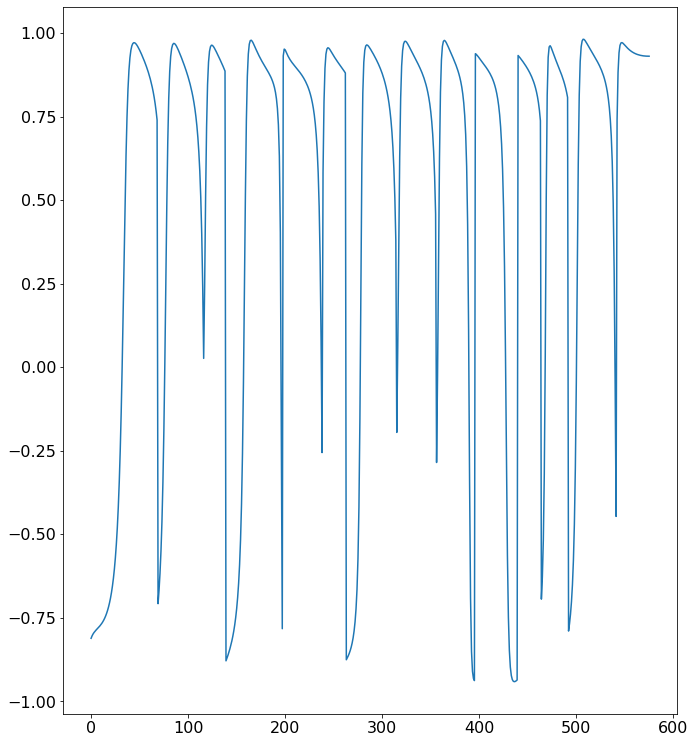

In [131]:
plt.plot(corr[:,1])

## For comparison of MITgcm and the dominant modes at the time

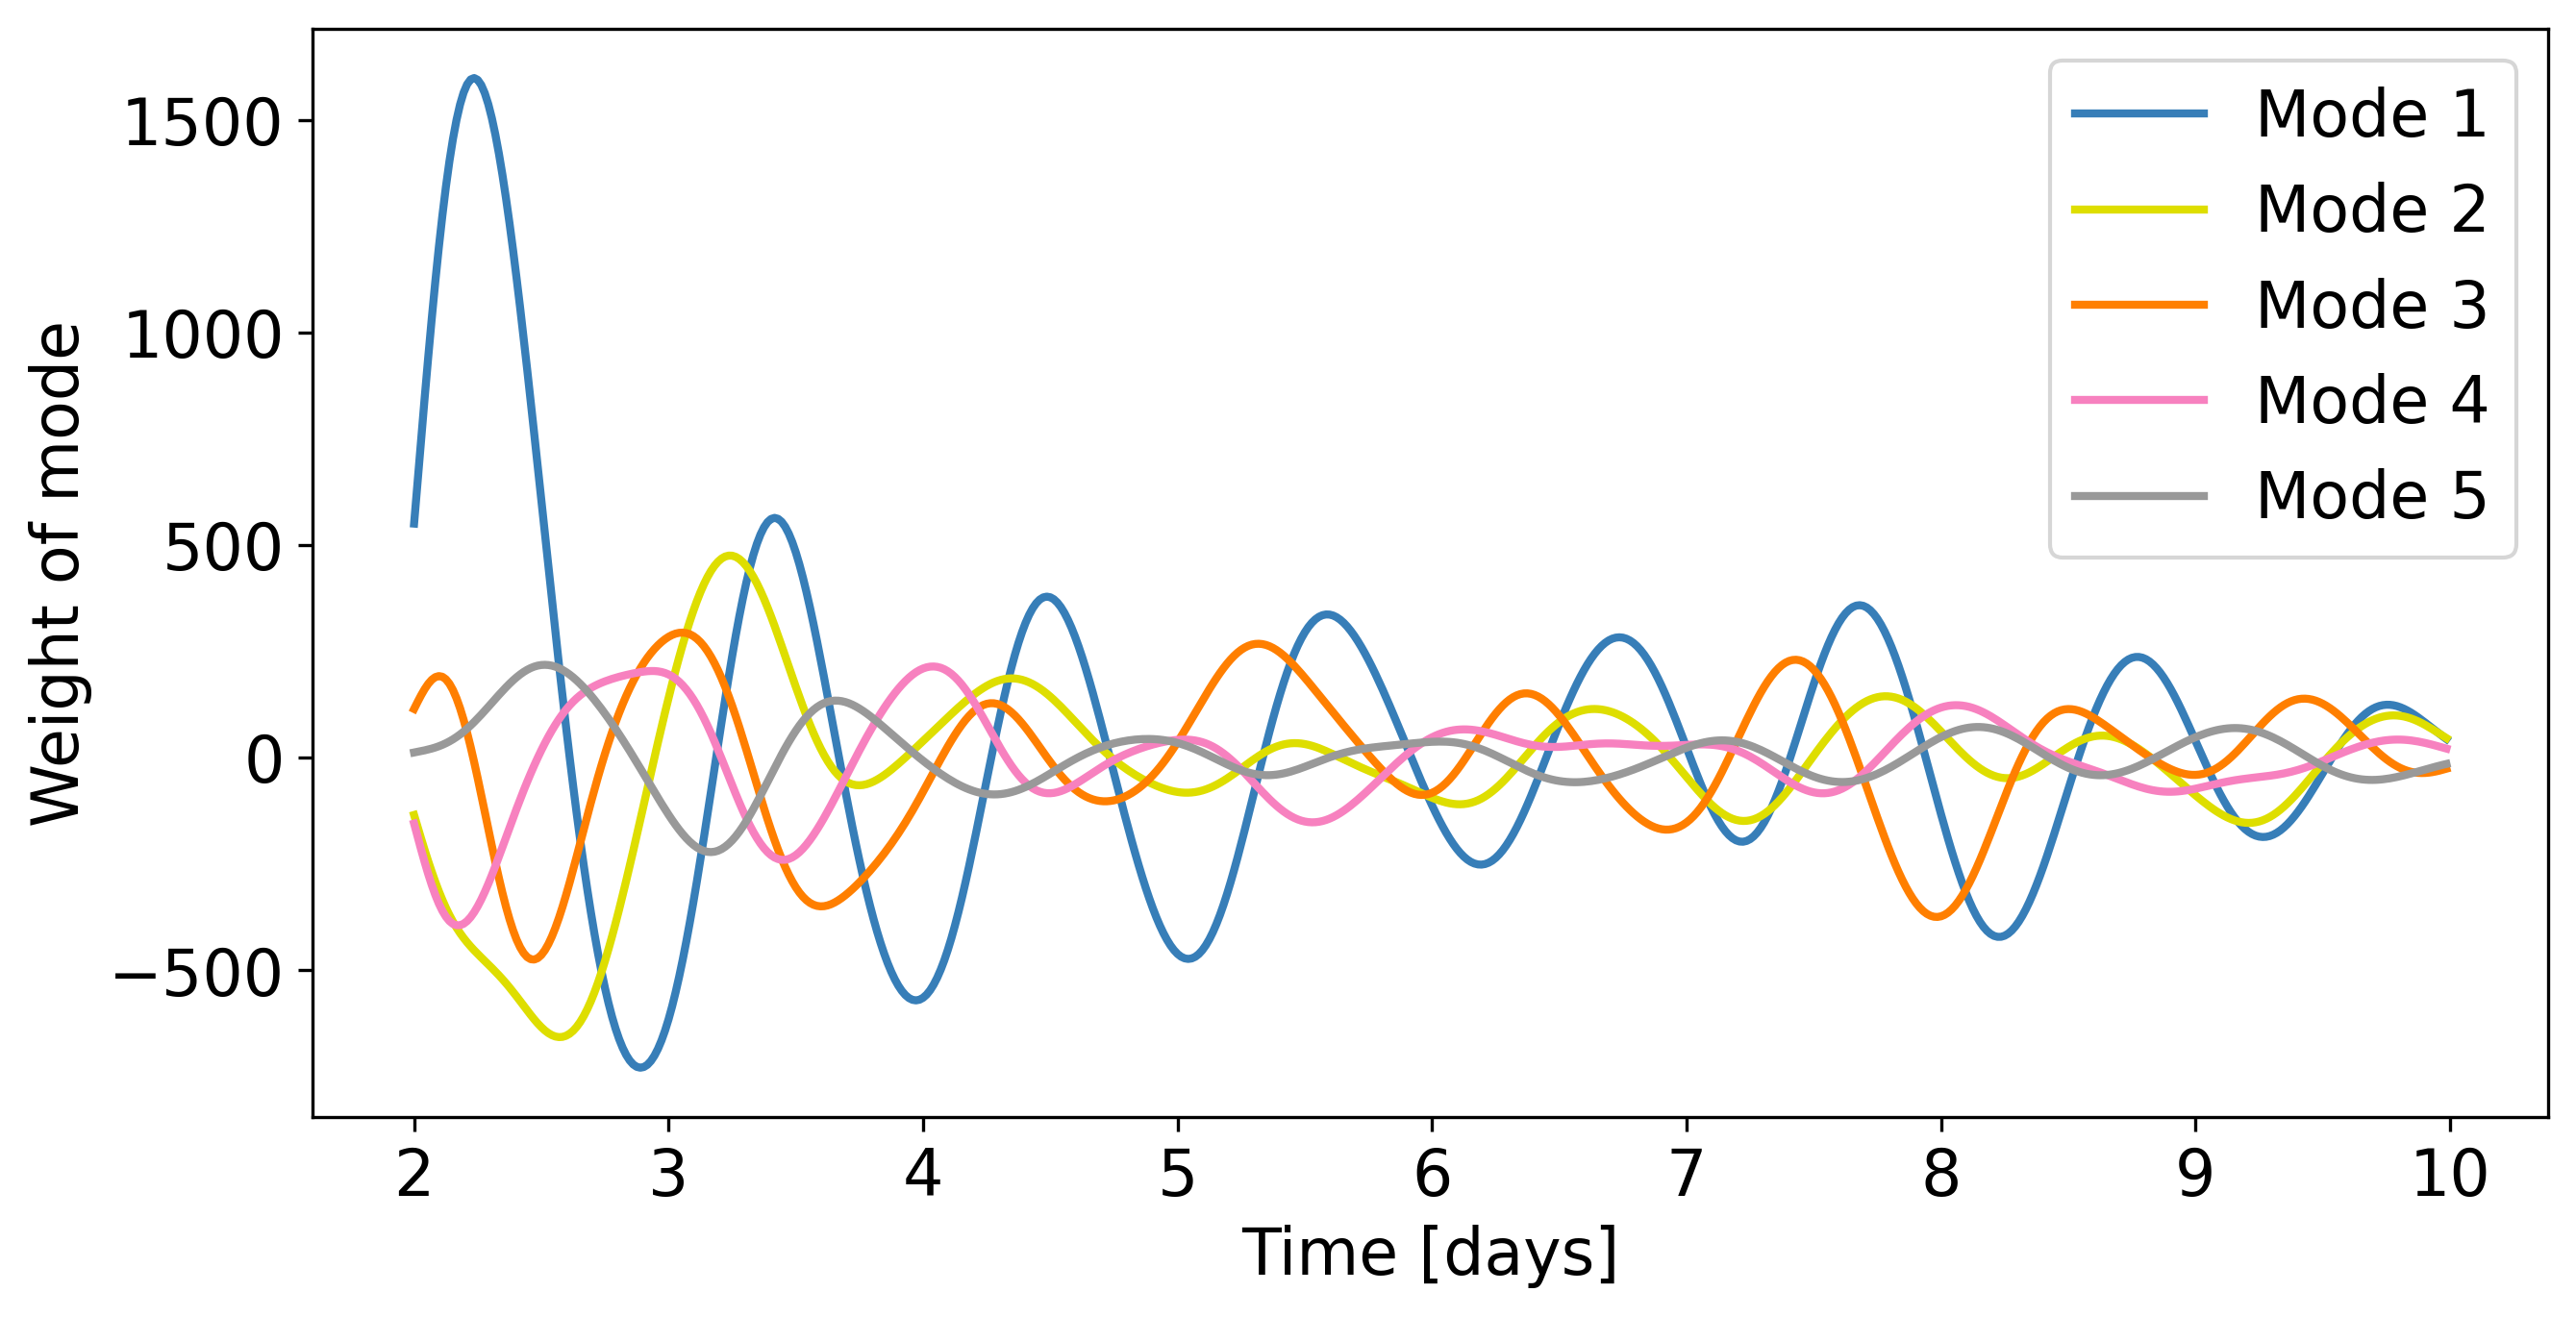

In [17]:
#fig,ax=plt.subplots()
indic=np.zeros(5)
for i in np.arange(1,6,1):
    plt.plot(TIME/(60*24),beta307[:,i], color=colors[i-1],label=f'Mode {i}', linewidth=2)
   # plt.plot(TIME[np.argmax(beta307[:,i])],np.max(beta307[:,i]),color=colors[i-1], marker=markers[i],markersize=20)
    indic[i-1]=np.argmax(beta307[:,i])
plt.xlabel('Time [days]')   
plt.ylabel('Weight of mode')
plt.legend()
#plt.annotate('30.7°N', (-27,4000))

## OBS!  THIS IS NOT MODES I JUST HAVENT FIXED THE TITLES, IT SHOWS THE MITGCM STRUCTURE FOR THE TIMES WHEN EACH MODE HAS ITS MAX

In [42]:
inds= np.asarray(indic, dtype = 'int')


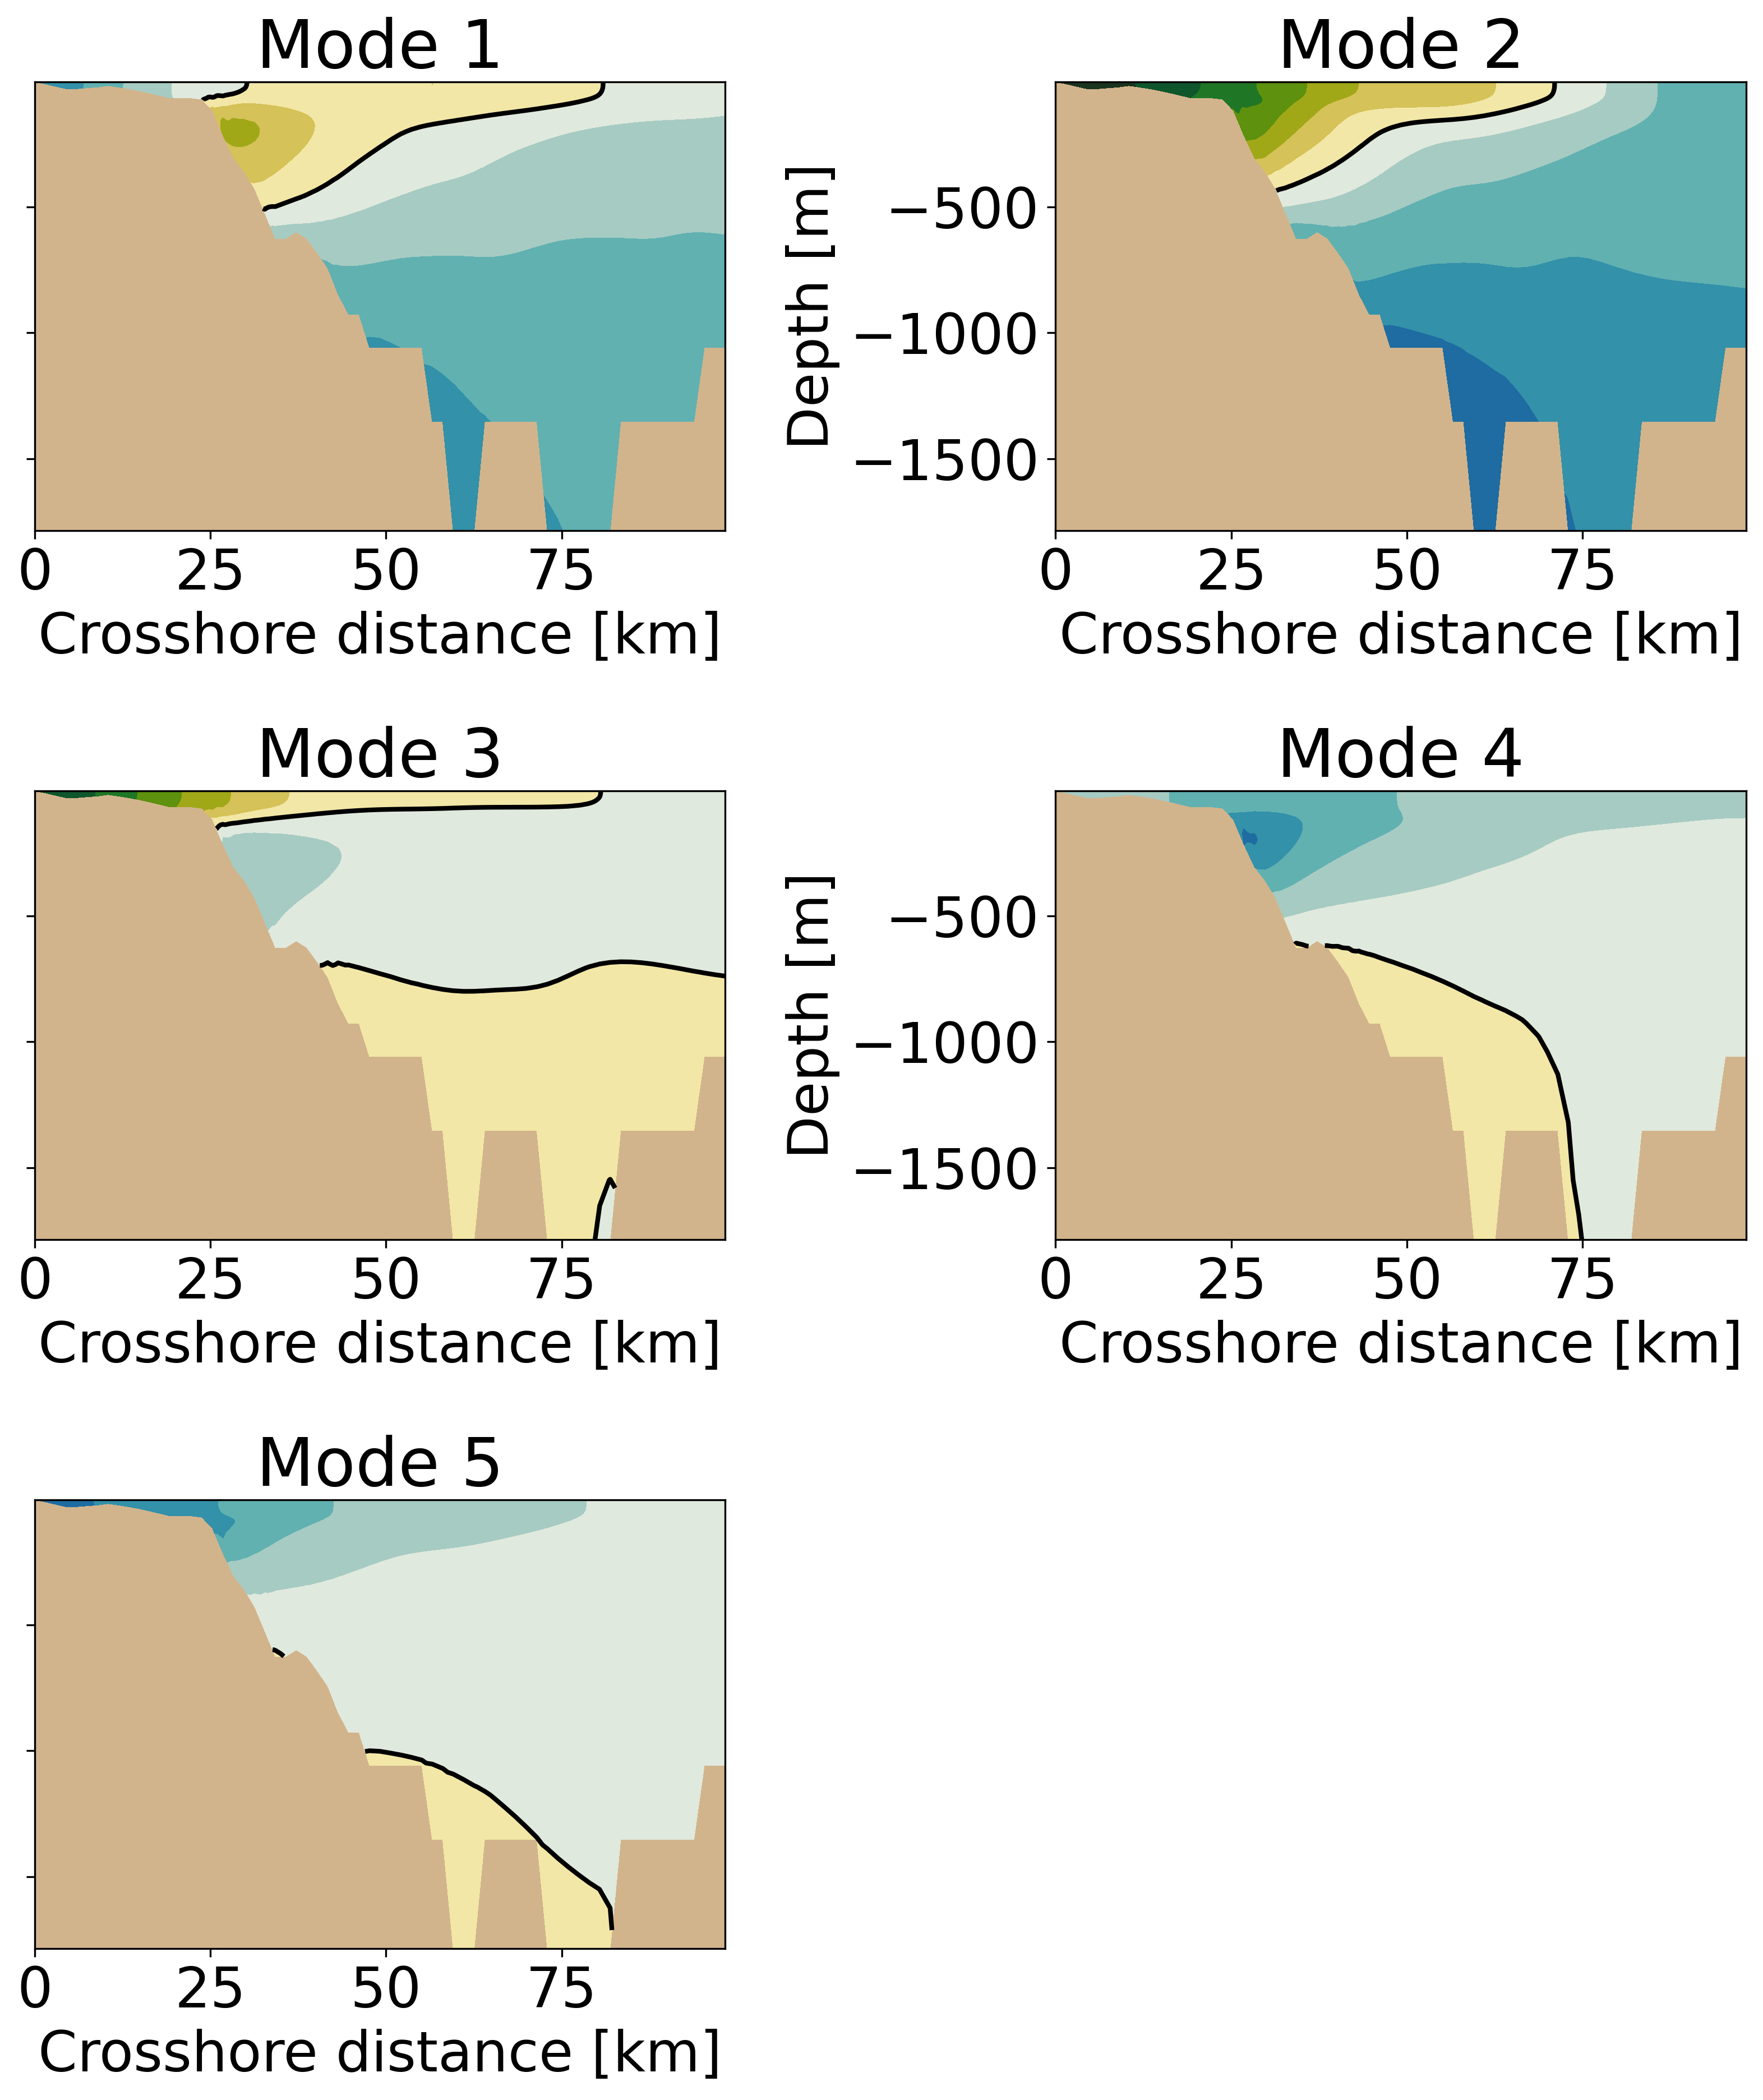

In [44]:
vminb=-np.nanmax(abs(VALMIT[17]))
vmaxb=np.nanmax(abs(VALMIT[17]))

levelsb=np.linspace(vminb,vmaxb,15)

xlab='Crosshore distance [km]'
ylab='Depth [m]'
    
fig = plt.figure(tight_layout=True)

gs = GridSpec(nrows=3, ncols=2)

    
for i in np.arange(-1,5-1,1):
        if i<=0:
            ax = fig.add_subplot(gs[0, i+1])
        elif i<=2:
            ax = fig.add_subplot(gs[1, i-1])
        elif i<=4:
            ax = fig.add_subplot(gs[2, i-3])
        elif i<=6:
            ax = fig.add_subplot(gs[3, i-5])
        cax2=plotbrink(ax,grid_X,grid_Z,levelsb,xlab,ylab,i+1,VALMIT[inds[i]],0)